# Ingeniería de Características: Transformaciones de Variables (Core)
 **Descripción:**

En esta actividad, aplicarás diversas técnicas de transformación de variables para mejorar la calidad de los datos en el dataset «House Prices – Advanced Regression Techniques» disponible en Kaggle. Aprenderás a realizar transformaciones logarítmicas, escalado y creación de variables polinómicas para mejorar el rendimiento de los modelos predictivos.

Enlace al dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques


**Objetivo:**

El objetivo es realizar transformaciones de las variables en el dataset para mejorar la distribución de los datos y su relación con la variable objetivo (el precio de las casas). Estas transformaciones son clave para mejorar la precisión de los modelos de regresión y reducir sesgos en los datos.

In [1]:
# Agregar la carpeta 'src' al sys.path
import sys
import os

# Buscar 'src' automáticamente sin depender del nombre del proyecto
current_dir = os.getcwd()  # Directorio actual
while not os.path.exists(os.path.join(current_dir, "src")):
    current_dir = os.path.dirname(current_dir)  # Subir un nivel
    if current_dir == "/":  # Evitar bucles infinitos
        raise FileNotFoundError("No se encontró la carpeta 'src'. Verifica la estructura.")

src_path = os.path.join(current_dir, "src")
if src_path not in sys.path:
    sys.path.append(src_path)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve,auc, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris

from utils import cargar_datos_pd
from utils import dimensiones
from utils import ver_resumen_nulos
from utils import identificar_atipicos_IQR
from utils import ver_diccionario
from utils import imprimir_bigotes
from utils import plot_varianza
from utils import filtrar_columnas
from utils import desc
from utils import imprimir_bigotes_por_grupo
from utils import generar_diccionario
from utils import obtener_filas_no_numericas

**Instrucciones:**

1. Carga de datos:

In [2]:
diccionario = '../../data/kaggle/core04/diccionario.csv'
ruta_archivo='../../data/kaggle/core04/train.csv'

df = cargar_datos_pd(ruta_archivo,sep=',', header=0)
df_bkp = df.copy()

Dataset cargado con éxito.


In [3]:
# Eliminamos el Id de las casas.
df = df.drop("Id", axis=1)

In [4]:
ver_diccionario(diccionario)

╒═════╤═══════════════╤═════════╤══════════════════════════════════════════════════════════════╤═══════════╕
│   # │ Columna       │ Tipo    │ Descripción                                                  │ Ejemplo   │
╞═════╪═══════════════╪═════════╪══════════════════════════════════════════════════════════════╪═══════════╡
│   1 │ Id            │ int64   │ Identificador único de la propiedad                          │ 1         │
├─────┼───────────────┼─────────┼──────────────────────────────────────────────────────────────┼───────────┤
│   2 │ MSSubClass    │ int64   │ Clase del edificio residencial                               │ 20        │
├─────┼───────────────┼─────────┼──────────────────────────────────────────────────────────────┼───────────┤
│   3 │ MSZoning      │ object  │ Zona de uso de la propiedad                                  │ RL        │
├─────┼───────────────┼─────────┼──────────────────────────────────────────────────────────────┼───────────┤
│   4 │ LotFrontage

In [5]:
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
PoolQC,7,1453,99.52
MiscFeature,54,1406,96.30
Alley,91,1369,93.77
Fence,281,1179,80.75
MasVnrType,588,872,59.73
...,...,...,...
MoSold,1460,0,0.00
YrSold,1460,0,0.00
SaleType,1460,0,0.00
SaleCondition,1460,0,0.00


In [6]:
# Ver calores de Elctrical
df['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [7]:
#Asignar SBrkr a Electrical donde sea nulo
df.loc[df['Electrical'].isnull(), 'Electrical'] = 'SBrkr'

In [8]:
# Asignar cero a MasVnrArea donde MasVnrArea sea nulo
df.loc[df['MasVnrArea'].isnull(), 'MasVnrArea'] = 0

In [9]:
# Asignar 'NA' a MasVnrType donde MasVnrType sea nulo
df.loc[df['MasVnrType'].isnull(), 'MasVnrType'] = 'NA'

In [10]:
# Asignar cero a GarageYrBlt donde GarageArea sea CERO. 
df.loc[df['GarageArea'] == 0, 'GarageYrBlt'] = 0

In [11]:
# Asignar 'NA' a las columnas especificadas donde TotalBsmtSF sea cero
columns_to_update = ['BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual','BsmtFinType1']

df.loc[df['TotalBsmtSF'] == 0, columns_to_update] = 'NA'

In [12]:
# Asignar 'NA' a BsmtExposure donde sea nulo
df.loc[df['BsmtExposure'].isnull(), 'BsmtExposure'] = 'NA'

# Asingar 'NA' a BsmtFinType2 donde sea nulo
df.loc[df['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'NA'


In [13]:
# Asignar 'NA' a las columnas especificadas donde GarageArea sea cero
columns_to_update = ['GarageQual', 'GarageFinish', 'GarageType', 'GarageCond']

df.loc[df['GarageArea'] == 0, columns_to_update] = 'NA'

In [14]:
# Asignar 'NA' a las columnas especificadas donde GarageArea sea cero
columns_to_update = ['GarageQual', 'GarageFinish', 'GarageType', 'GarageCond']

df.loc[df['GarageArea'] == 0, columns_to_update] = 'NA'



In [15]:
# Lista de los valores de MSSubClass que probablemente no tengan 'LotFrontage'
no_lotfrontage_values = [90, 120, 150, 160, 180, 190]

# Modificar las filas que tienen esos valores en MSSubClass y asignar 'LotFrontage' a 0
df.loc[df['MSSubClass'].isin(no_lotfrontage_values), 'LotFrontage'] = 0



In [16]:
# Asignar a LotFrontage cero si tiene un valor nulo
df.loc[df['LotFrontage'].isnull(), 'LotFrontage'] = 0

In [17]:
df['PoolArea'].describe().T

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

In [18]:
# Aplicar NA a FireplaceQu donde Fireplaces sea CERO.
df.loc[df['Fireplaces'] == 0, 'FireplaceQu'] = 'NA'

In [19]:
# Ver valores de MasVnrType
df['MasVnrType'].value_counts()

MasVnrType
NA         872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [20]:
# Aplicar NA MasVnrType donde MasVnrArea sea cero.
df.loc[df['MasVnrArea'] == 0, 'MasVnrType'] = 'NA'

In [21]:
# Ver valores de Fence
df['Fence'].value_counts()


Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [22]:
# Aplicar NA Fence donde Fence sea NULO
df.loc[df['Fence'].isnull(), 'Fence'] = 'NA'

In [23]:
# Eliminar Alley por que no hay forma de determinar y no aporta mucho
df = df.drop("Alley", axis=1)

In [24]:
# Aplicar NA PoolQC donde Pool area sea cero.
df.loc[df['PoolArea'] == 0, 'PoolQC'] = 'NA'


In [25]:
# Quiero ver el PoolArea de las casas con Nulos en PoolQC.
df[df['PoolQC'].isnull()]['PoolArea']

Series([], Name: PoolArea, dtype: int64)

In [26]:
# Ver valores de MiscFeature
df['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [27]:
# Si tiene GarageCars tiene mayor a uno entonces MiscFeature es Gar2
df.loc[df['GarageCars'] > 1, 'MiscFeature'] = 'Gar2'

In [28]:
# A todos los MiscFeature son nulos asignar NA
df['MiscFeature'] = df['MiscFeature'].fillna('NA')

In [29]:
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
MSSubClass,1460,0,0.0
MSZoning,1460,0,0.0
LotFrontage,1460,0,0.0
LotArea,1460,0,0.0
Street,1460,0,0.0
...,...,...,...
MoSold,1460,0,0.0
YrSold,1460,0,0.0
SaleType,1460,0,0.0
SaleCondition,1460,0,0.0


# No hay nulos

In [30]:
# Realizamos la copia del df original a uno sin transformaciones para comparar luego.
df_bkp = df.copy()

- Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.

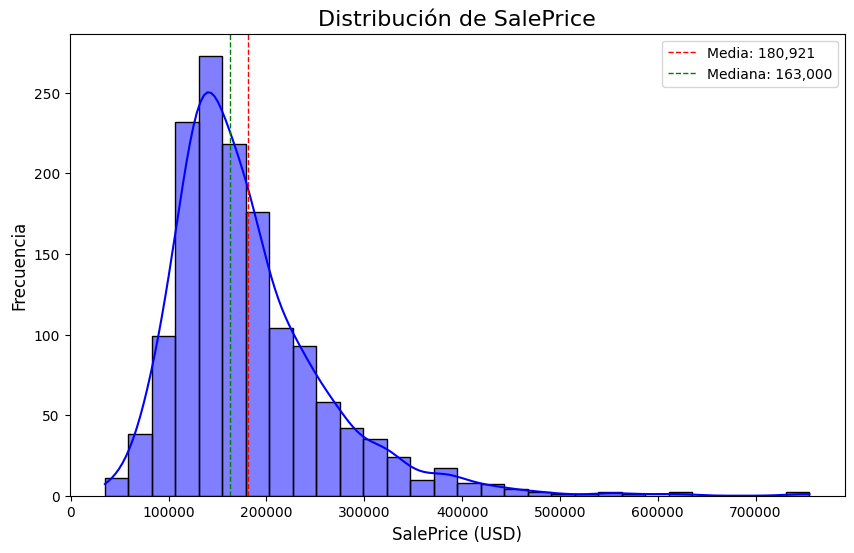

Media: 180921.20
Mediana: 163000.00
Desviación estándar: 79442.50
Asimetría (Skewness): 1.88
Curtosis: 6.54


In [31]:
# Extraemos la columna "SalePrice" (precios de las casas) del dataset "df".
sale_price = df["SalePrice"]

# Calculamos algunas estadísticas importantes:
mean_price = sale_price.mean()  # Calculamos el promedio (la media) de los precios.
median_price = sale_price.median()  # Calculamos la mediana (el valor del medio).
std_dev_price = sale_price.std()  # Calculamos cuánto varían los precios (desviación estándar).
skewness_price = sale_price.skew()  # Calculamos la asimetría (si hay precios muy altos que sesgan la gráfica).
kurtosis_price = sale_price.kurt()  # Calculamos la curtosis (qué tan puntiaguda es la gráfica).

# Dibujamos la distribución de los precios.
plt.figure(figsize=(10, 6))  # Configuramos el tamaño del gráfico.
sns.histplot(sale_price, kde=True, color="blue", bins=30)  # Dibujamos un histograma con una curva KDE (de densidad).
plt.title("Distribución de SalePrice", fontsize=16)  # Ponemos un título al gráfico.
plt.xlabel("SalePrice (USD)", fontsize=12)  # Etiquetamos el eje horizontal con "SalePrice".
plt.ylabel("Frecuencia", fontsize=12)  # Etiquetamos el eje vertical con "Frecuencia".
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=1, label=f"Media: {mean_price:,.0f}")  # Línea roja en la media.
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=1, label=f"Mediana: {median_price:,.0f}")  # Línea verde en la mediana.
plt.legend()  # Mostramos una leyenda para explicar las líneas.
plt.show()  # Mostramos el gráfico.

# Mostramos los valores calculados para referencia.
print(f"Media: {mean_price:.2f}")  # Imprimimos el promedio.
print(f"Mediana: {median_price:.2f}")  # Imprimimos la mediana.
print(f"Desviación estándar: {std_dev_price:.2f}")  # Imprimimos la desviación estándar.
print(f"Asimetría (Skewness): {skewness_price:.2f}")  # Imprimimos la asimetría.
print(f"Curtosis: {kurtosis_price:.2f}")  # Imprimimos la curtosis.


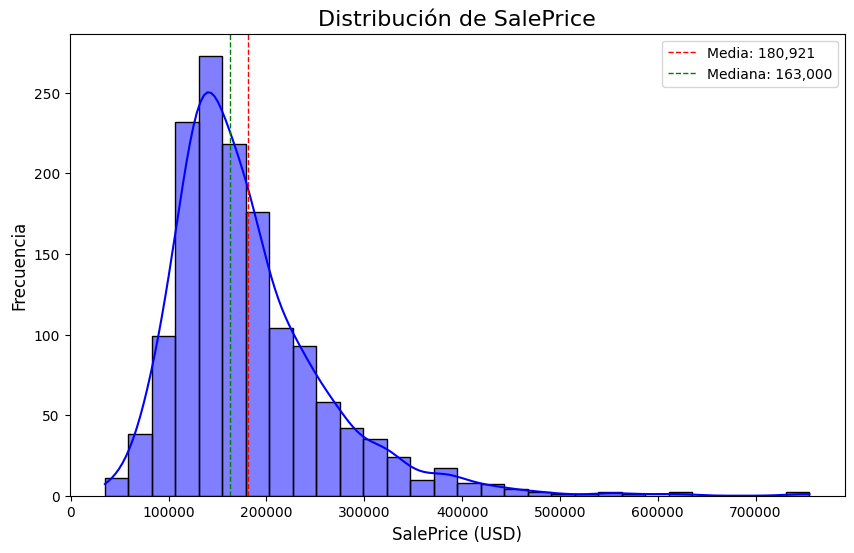

Media: 180921.20
Mediana: 163000.00
Desviación estándar: 79442.50
Asimetría (Skewness): 1.88
Curtosis: 6.54


In [32]:
# Extraemos la columna "SalePrice" (precios de las casas) del dataset "df".
sale_price = df["SalePrice"]

# Calculamos algunas estadísticas importantes:
mean_price = sale_price.mean()  # Promedio (media): El valor promedio de los precios. Útil para entender el punto "central".
median_price = sale_price.median()  # Mediana: El valor que está en el medio cuando ordenamos los precios. No se ve afectado por precios extremos.
std_dev_price = sale_price.std()  # Desviación estándar: Nos dice cuánto varían los precios en promedio respecto al promedio.
skewness_price = sale_price.skew()  # Asimetría (Skewness): Si es positiva, significa que hay más precios bajos y algunos precios altos están "estirando" la cola derecha.
kurtosis_price = sale_price.kurt()  # Curtosis: Si es alta, significa que la distribución tiene un pico más pronunciado o valores extremos más frecuentes.

# Dibujamos la distribución de los precios.
plt.figure(figsize=(10, 6))  # Configuramos el tamaño del gráfico.
sns.histplot(sale_price, kde=True, color="blue", bins=30)  # Histograma: Muestra cuántas casas tienen precios en ciertos rangos.
plt.title("Distribución de SalePrice", fontsize=16)  # Ponemos un título al gráfico.
plt.xlabel("SalePrice (USD)", fontsize=12)  # Etiqueta para el eje horizontal: muestra los precios.
plt.ylabel("Frecuencia", fontsize=12)  # Etiqueta para el eje vertical: muestra cuántas casas están en cada rango de precio.
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=1, label=f"Media: {mean_price:,.0f}")  # Línea roja en la media.
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=1, label=f"Mediana: {median_price:,.0f}")  # Línea verde en la mediana.
plt.legend()  # Mostramos una leyenda para explicar las líneas.
plt.show()  # Mostramos el gráfico.

# Mostramos los valores calculados y explicamos cómo interpretarlos.
print(f"Media: {mean_price:.2f}")  # Media: Valor promedio. Si es mayor que la mediana, puede haber precios altos que sesgan el promedio.
print(f"Mediana: {median_price:.2f}")  # Mediana: El precio que divide en dos el grupo de precios. Si es menor que la media, hay una distribución sesgada.
print(f"Desviación estándar: {std_dev_price:.2f}")  # Desviación estándar: Un valor alto indica que los precios varían mucho (hay casas muy caras y muy baratas).
print(f"Asimetría (Skewness): {skewness_price:.2f}")  # Asimetría: Si es positiva, la mayoría de los precios son bajos con algunos precios muy altos.
print(f"Curtosis: {kurtosis_price:.2f}")  # Curtosis: Un valor alto indica que hay más valores extremos (precios fuera de lo común).


### Cómo entender los resultados:

1. **Media y Mediana**:
   - Si **Media > Mediana**, significa que hay precios muy altos que están "jalando" el promedio hacia arriba (sesgo positivo).
   - Si **Media ≈ Mediana**, la distribución es más balanceada.

2. **Desviación estándar**:
   - Valores altos: Los precios están muy dispersos (gran diferencia entre los precios más bajos y más altos).
   - Valores bajos: Los precios son más uniformes.

3. **Asimetría (Skewness)**:
   - Valor **positivo**: Más precios bajos con algunos precios altos que estiran la cola derecha.
   - Valor **negativo**: Más precios altos con algunos precios bajos que estiran la cola izquierda.

4. **Curtosis**:
   - Valor **alto** (>3): Hay más picos y valores extremos (precios inusuales).
   - Valor **bajo** (<3): Distribución más plana con menos extremos.



# 2. Exploración y preprocesamiento de datos:
- Antes de aplicar las transformaciones, realiza un análisis de las variables con distribuciones asimétricas o que contengan outliers. Estos son buenos candidatos para transformaciones logarítmicas o polinómicas.
- También identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.

### Explicación de cada parte:

1. **Detección de asimetrías**:
   - Variables con **skewness > 0.75** tienen distribuciones significativamente sesgadas y son candidatas a transformaciones logarítmicas o similares.
   - El histograma ayuda a visualizar cómo está distribuida cada variable.

2. **Detección de outliers**:
   - Calculamos cuántos valores están fuera de 3 desviaciones estándar de la media. Estos son posibles outliers.

3. **Detección de escalas diferentes**:
   - Calculamos el rango de cada variable para identificar aquellas con magnitudes muy distintas. Variables con rangos amplios pueden desbalancear los modelos y necesitan normalización o estandarización.

### Resultado:
Al correr este código, tendrás:
- Variables que requieren transformaciones.
- Variables con outliers destacados.
- Variables con rangos de escala muy diferentes.

Puedes usar esta información para aplicar las técnicas adecuadas de preprocesamiento. 😊


Variables con alta asimetría (skewness > 0.75):
MSSubClass        1.407657
LotArea          12.207688
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtHalfBath      4.103403
KitchenAbvGr      4.488397
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
SalePrice         1.882876
dtype: float64

Número de outliers por variable:
MSSubClass       30
LotFrontage       5
LotArea          13
OverallQual       2
OverallCond      28
YearBuilt         6
MasVnrArea       32
BsmtFinSF1        6
BsmtFinSF2       50
BsmtUnfSF        11
TotalBsmtSF      10
1stFlrSF         12
2ndFlrSF          4
LowQualFinSF     20
GrLivArea        16
BsmtFullBath     16
BsmtHalfBath    

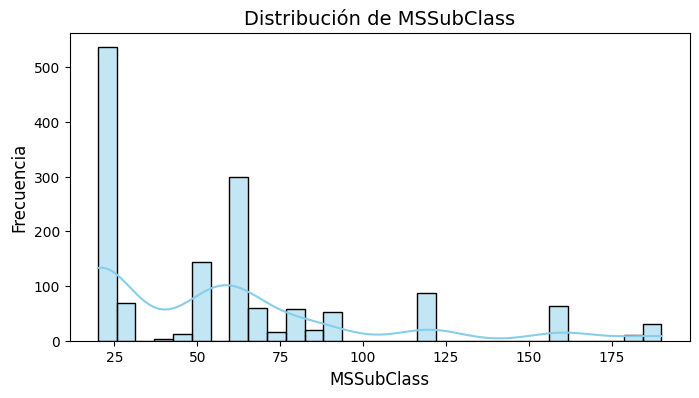

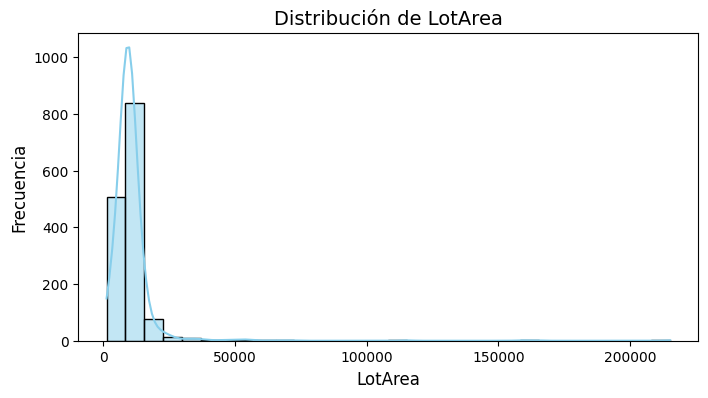

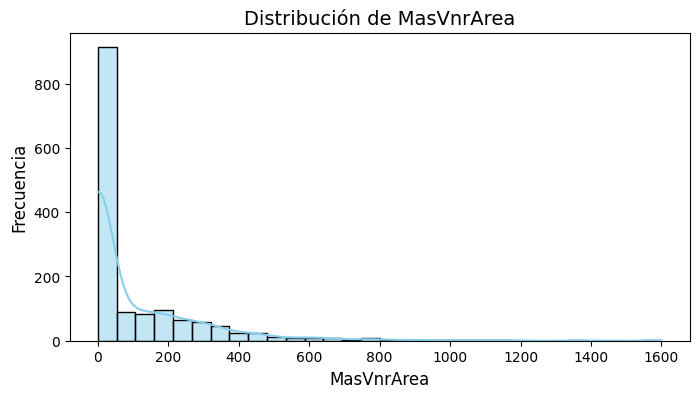

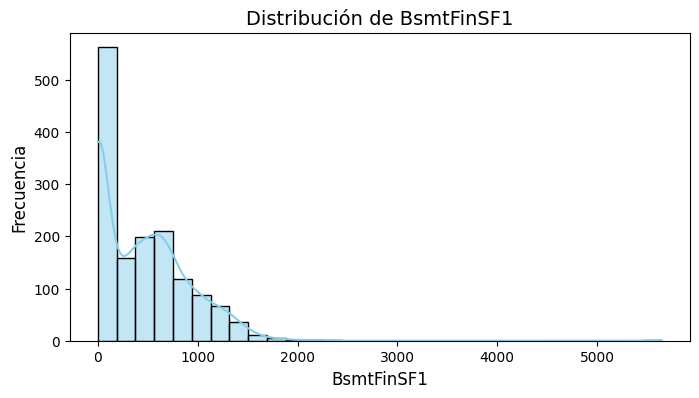

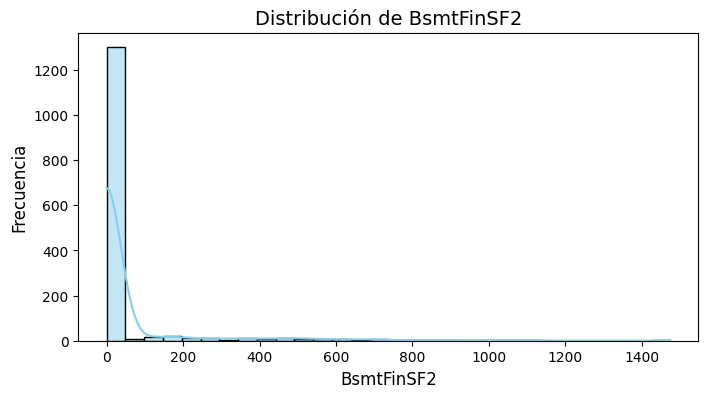

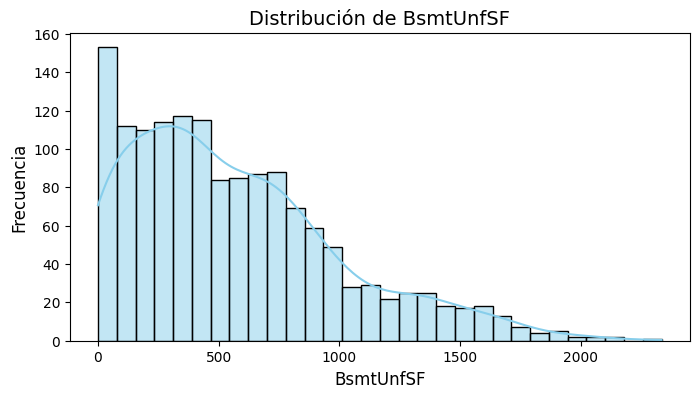

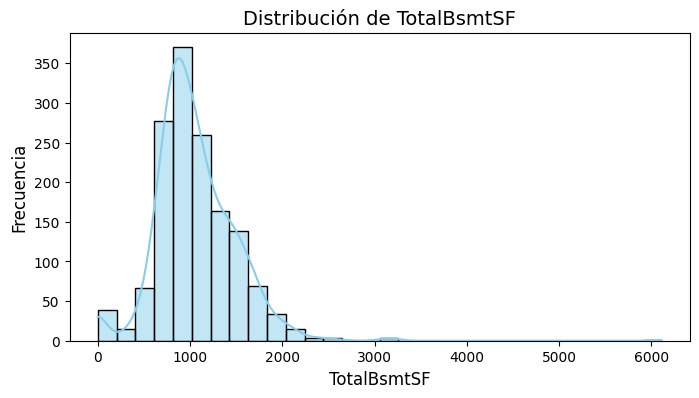

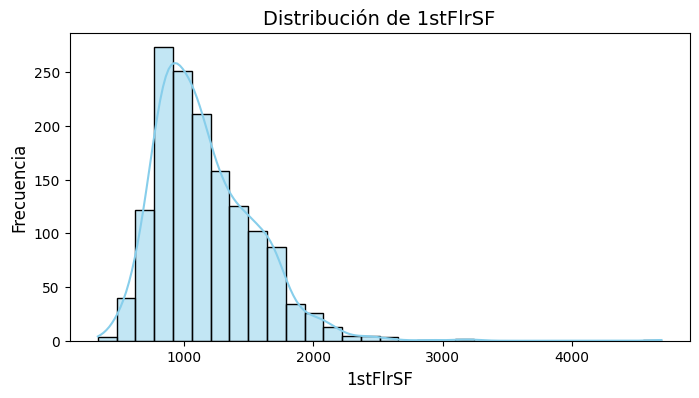

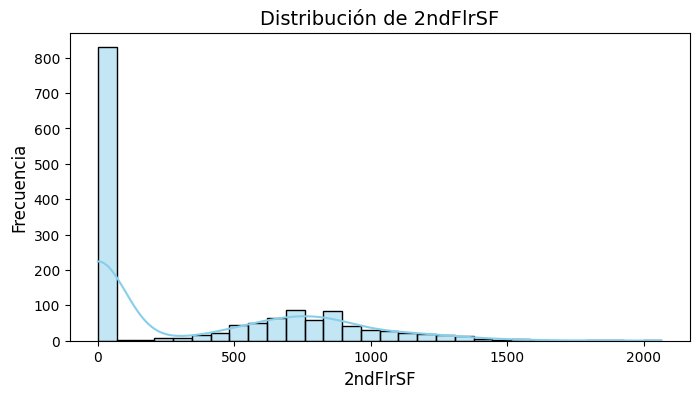

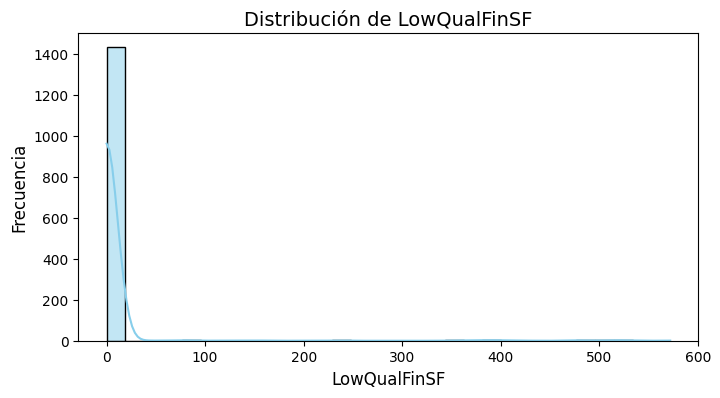

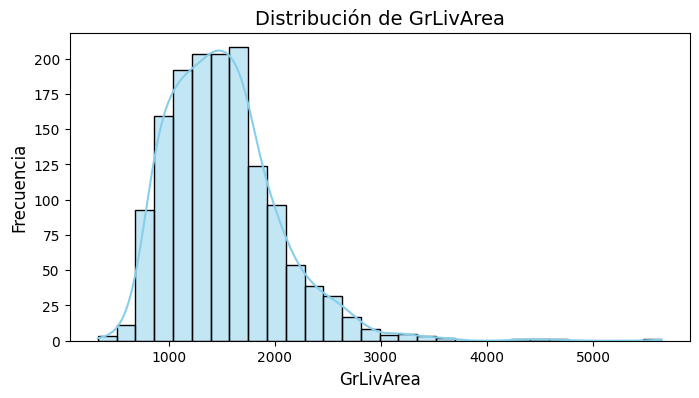

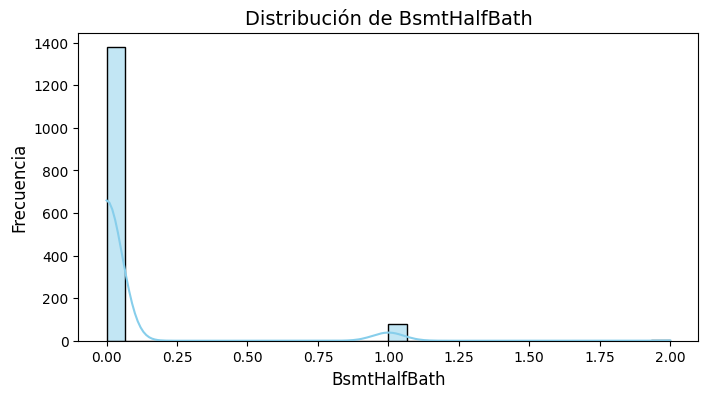

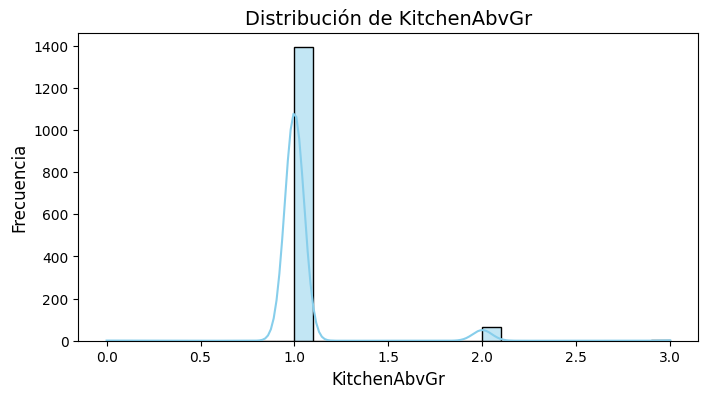

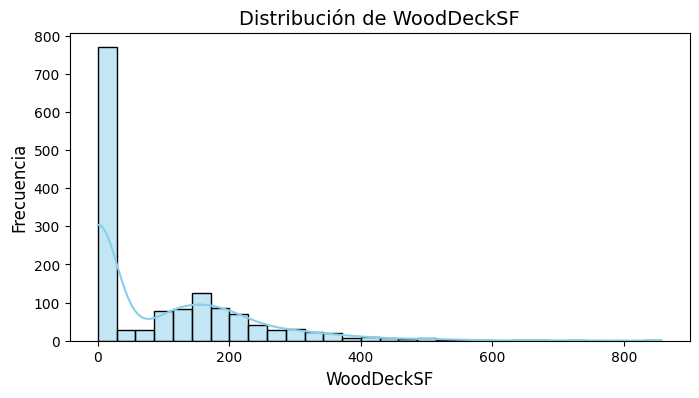

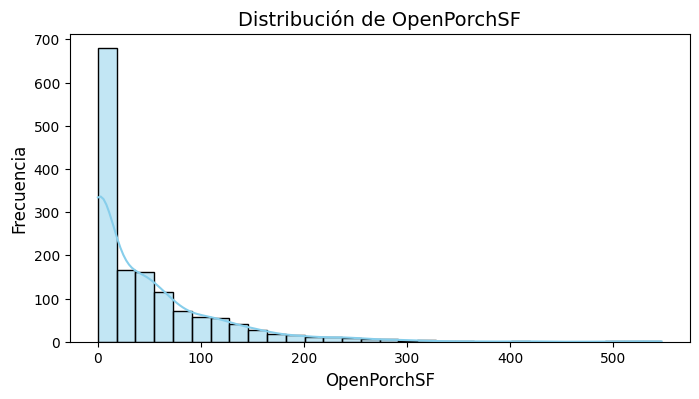

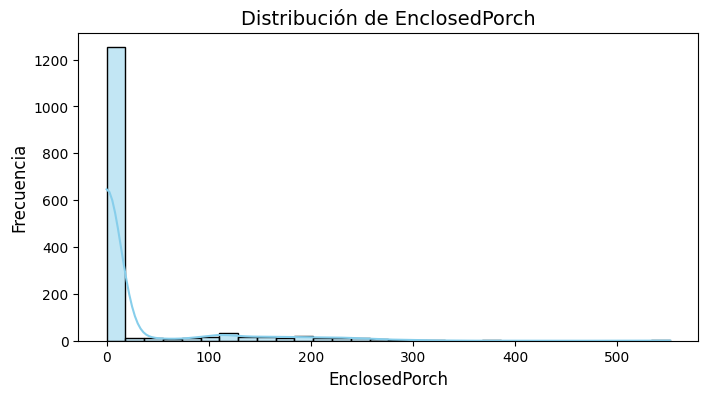

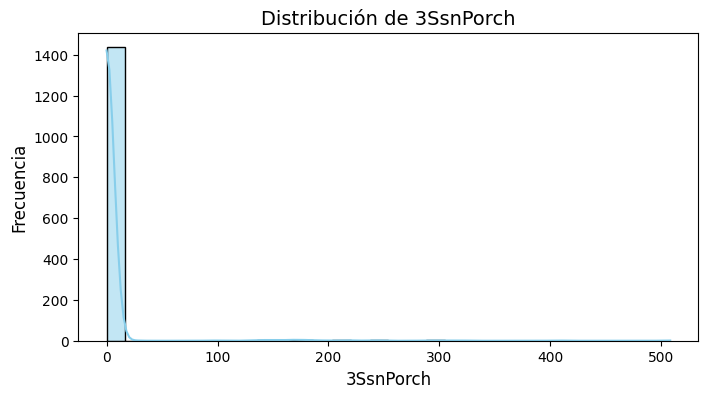

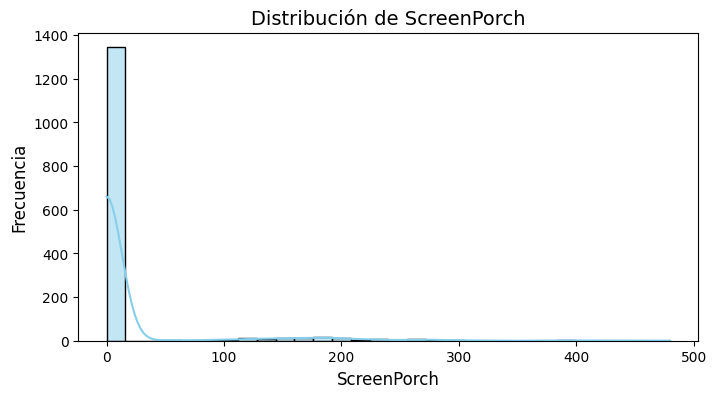

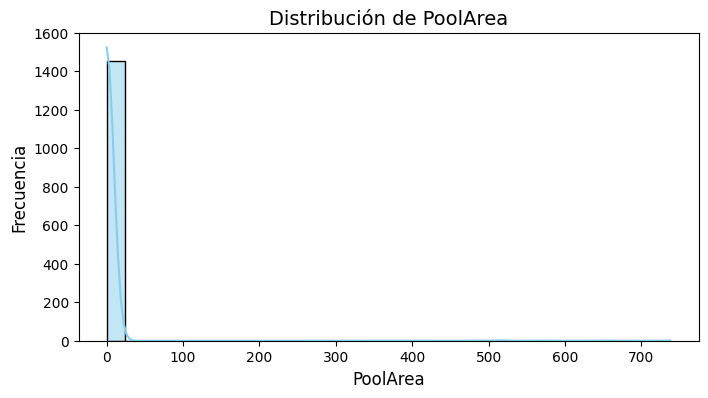

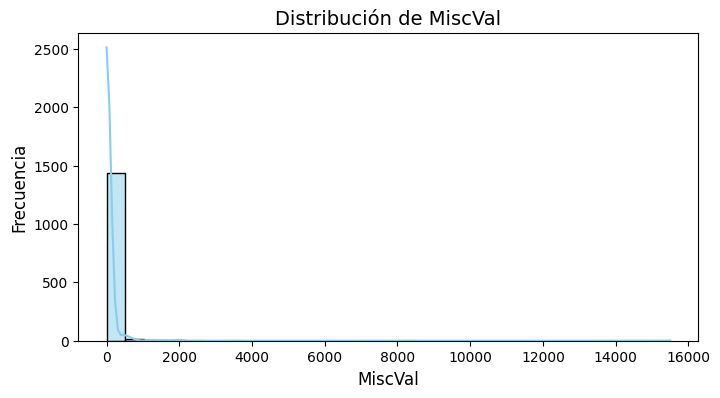

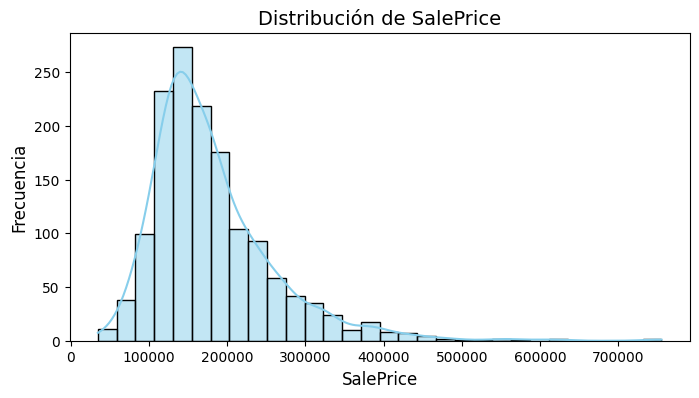


Rangos de las variables numéricas:
                   min       max     range
SalePrice      34900.0  755000.0  720100.0
LotArea         1300.0  215245.0  213945.0
MiscVal            0.0   15500.0   15500.0
TotalBsmtSF        0.0    6110.0    6110.0
BsmtFinSF1         0.0    5644.0    5644.0
GrLivArea        334.0    5642.0    5308.0
1stFlrSF         334.0    4692.0    4358.0
BsmtUnfSF          0.0    2336.0    2336.0
2ndFlrSF           0.0    2065.0    2065.0
GarageYrBlt        0.0    2010.0    2010.0
MasVnrArea         0.0    1600.0    1600.0
BsmtFinSF2         0.0    1474.0    1474.0
GarageArea         0.0    1418.0    1418.0
WoodDeckSF         0.0     857.0     857.0
PoolArea           0.0     738.0     738.0
LowQualFinSF       0.0     572.0     572.0
EnclosedPorch      0.0     552.0     552.0
OpenPorchSF        0.0     547.0     547.0
3SsnPorch          0.0     508.0     508.0
ScreenPorch        0.0     480.0     480.0
LotFrontage        0.0     313.0     313.0
MSSubClass        

In [33]:
# --- Exploración de variables con distribuciones asimétricas y outliers ---

# Visualizamos la distribución de todas las columnas numéricas.
num_cols = df.select_dtypes(include=[np.number])  # Seleccionamos solo las columnas numéricas.

# Calculamos estadísticas básicas para entender las distribuciones.
skewness = num_cols.skew()  # Calcula la asimetría (skewness) de cada columna numérica.
outliers = num_cols.apply(lambda x: ((x < (x.mean() - 3*x.std())) | (x > (x.mean() + 3*x.std()))).sum())  # Outliers usando 3 desviaciones estándar.

# Mostramos variables con alta asimetría (> 0.75).
print("Variables con alta asimetría (skewness > 0.75):")
print(skewness[skewness > 0.75])

# Mostramos variables con presencia significativa de outliers.
print("\nNúmero de outliers por variable:")
print(outliers[outliers > 0])  # Mostramos solo las variables con outliers.

# Visualizamos distribuciones de algunas variables con alta asimetría o outliers.
for col in skewness[skewness > 0.75].index:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribución de {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.show()

# --- Identificación de variables con escalas diferentes ---

# Resumen de los valores mínimo, máximo, y rango para las columnas numéricas.
range_stats = num_cols.describe().loc[['min', 'max']].T  # Obtenemos los valores mínimos y máximos.
range_stats['range'] = range_stats['max'] - range_stats['min']  # Calculamos el rango (diferencia entre max y min).

# Mostramos variables con rangos significativamente diferentes.
print("\nRangos de las variables numéricas:")
print(range_stats.sort_values(by='range', ascending=False))

# --- Siguientes pasos sugeridos ---
# 1. Para variables con alta asimetría o outliers:
#    - Aplica transformaciones logarítmicas (si los datos son positivos) o polinómicas según la necesidad.
#    - Considera eliminarlos si afectan el modelo de forma significativa.
#
# 2. Para variables con rangos diferentes:
#    - Aplica normalización (valores entre 0 y 1) o estandarización (media 0, desviación estándar 1).
#    - Esto es especialmente útil si planeas usar modelos sensibles a las escalas, como regresión logística o k-NN.


### Variables con alta asimetría (skewness > 0.75):
Las siguientes variables tienen una distribución sesgada (asimétrica) y pueden beneficiarse de transformaciones logarítmicas para hacer que su distribución sea más normal:
- **SalePrice**: El precio de venta de la casa, con un sesgo moderado (1.88).
- **LotFrontage**: Frente del lote (2.16).
- **LotArea**: Tamaño del terreno (12.21).
- **MasVnrArea**: Área de la fachada de piedra (2.67).
- **BsmtFinSF1**: Área terminada del sótano (1.69).
- **BsmtFinSF2**: Otra área terminada del sótano (4.26).
- **BsmtUnfSF**: Área no terminada del sótano (0.92).
- **TotalBsmtSF**: Área total del sótano (1.52).
- **1stFlrSF**: Área del primer piso (1.38).
- **2ndFlrSF**: Área del segundo piso (0.81).
- **LowQualFinSF**: Área de baja calidad en el sótano (9.01).
- **GrLivArea**: Área habitable en el nivel superior (1.37).
- **BsmtHalfBath**: Número de baños en el sótano (4.10).
- **KitchenAbvGr**: Número de cocinas (4.49).
- **WoodDeckSF**: Área de la terraza de madera (1.54).
- **OpenPorchSF**: Área del porche abierto (2.36).
- **EnclosedPorch**: Área del porche cerrado (3.09).
- **3SsnPorch**: Área del porche de tres estaciones (10.30).
- **ScreenPorch**: Área del porche con malla (4.12).
- **PoolArea**: Área de la piscina (14.83).
- **MiscVal**: Valor de características varias (24.48).

### Rangos de las variables numéricas:
A continuación, se muestran las variables numéricas con sus valores mínimos, máximos y rangos calculados:
- **SalePrice**: Rango de 720,100.0, con un precio mínimo de 34,900 y máximo de 755,000. Esta es la variable objetivo y tiene una gran variabilidad.
- **LotArea**: Rango de 213,945.0, con valores que van de 1,300 a 215,245, lo que indica una gran diferencia entre el tamaño de los lotes.
- **MiscVal**: Rango de 15,500.0, con valores entre 0 y 15,500. Este rango es relativamente grande, pero se trata de un atributo poco frecuente.
- **TotalBsmtSF**: Rango de 6,110.0, con valores entre 0 y 6,110.
- **BsmtFinSF1**: Rango de 5,644.0, con valores entre 0 y 5,644.
- **GrLivArea**: Rango de 5,308.0, con valores entre 334 y 5,642.
- **1stFlrSF**: Rango de 4,358.0, con valores entre 334 y 4,692.
- **BsmtUnfSF**: Rango de 2,336.0, con valores entre 0 y 2,336.
- **2ndFlrSF**: Rango de 2,065.0, con valores entre 0 y 2,065.
- **MasVnrArea**: Rango de 1,600.0, con valores entre 0 y 1,600.
- **BsmtFinSF2**: Rango de 1,474.0, con valores entre 0 y 1,474.
- **GarageArea**: Rango de 1,418.0, con valores entre 0 y 1,418.
- **WoodDeckSF**: Rango de 857.0, con valores entre 0 y 857.
- **PoolArea**: Rango de 738.0, con valores entre 0 y 738, mostrando un rango bastante grande, ya que pocas casas tienen piscina.
- **LowQualFinSF**: Rango de 572.0, con valores entre 0 y 572.
- **EnclosedPorch**: Rango de 552.0, con valores entre 0 y 552.
- **OpenPorchSF**: Rango de 547.0, con valores entre 0 y 547.
- **3SsnPorch**: Rango de 508.0, con valores entre 0 y 508.
- **ScreenPorch**: Rango de 480.0, con valores entre 0 y 480.

### Conclusión:
Al revisar la asimetría y los rangos de las variables:
1. **Transformaciones logarítmicas** pueden ser útiles para las variables con alta asimetría (como **SalePrice**, **LotArea**, **MiscVal**, entre otras).
2. **Normalización o estandarización** puede ser necesaria para algunas variables con rangos muy diferentes (como **SalePrice**, **LotArea**, **PoolArea**, etc.) para asegurar que los modelos de aprendizaje automático funcionen correctamente.

Este análisis es un paso clave antes de aplicar modelos de predicción, ya que las transformaciones adecuadas pueden mejorar significativamente el rendimiento del modelo.


# 3. Transformaciones de variables:
  - Aplica transformaciones logarítmicas a variables sesgadas como el «SalePrice» y otras variables numéricas que tengan una distribución sesgada.
  - Crea variables polinómicas a partir de las variables numéricas, como el tamaño total de la casa. Por ejemplo, agrega el cuadrado o el cubo de estas variables como nuevas características para capturar posibles relaciones no lineales.
  - Estandariza las variables numéricas para que todas tengan la misma escala, lo cual es útil cuando se entrenan modelos de regresión o algoritmos basados en distancia como KNN.

In [34]:
# Aplica transformaciones logarítmicas a las variables sesgadas

# **No transformamos SalePrice**, ya que es la variable objetivo.

# También aplicamos la transformación logarítmica a otras variables sesgadas
variables_sesgadas = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                      'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 
                      'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

for var in variables_sesgadas:
    df[f'{var}_log'] = np.log1p(df[var])

# Crea variables polinómicas para capturar relaciones no lineales
# Por ejemplo, el tamaño total de la casa puede estar relacionado de manera no lineal con el precio
df['TotalHouseSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']  # Tamaño total de la casa

# Añadimos el cuadrado y el cubo de esta nueva variable como nuevas características
df['TotalHouseSF_squared'] = df['TotalHouseSF']**2
df['TotalHouseSF_cubed'] = df['TotalHouseSF']**3

# También podemos hacer lo mismo con algunas otras variables relevantes si creemos que hay relaciones no lineales
df['LotArea_squared'] = df['LotArea']**2
df['GrLivArea_squared'] = df['GrLivArea']**2

# Estandariza las variables numéricas
# Creamos un objeto StandardScaler para normalizar las variables
scaler = StandardScaler()

# Seleccionamos las columnas numéricas para estandarizar (excluimos variables categóricas)
variables_numericas = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 
                       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                       'MiscVal', 'TotalHouseSF', 'TotalHouseSF_squared', 'TotalHouseSF_cubed', 
                       'LotArea_squared', 'GrLivArea_squared']

# Ajustamos el escalador y transformamos las variables numéricas
df[variables_numericas] = scaler.fit_transform(df[variables_numericas])

# Ver los primeros registros para comprobar los cambios
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch_log,3SsnPorch_log,ScreenPorch_log,PoolArea_log,MiscVal_log,TotalHouseSF,TotalHouseSF_squared,TotalHouseSF_cubed,LotArea_squared,GrLivArea_squared
0,60,RL,0.361674,-0.207142,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.0,0.0,0.0,0.0,-0.001277,-0.115756,-0.125148,-0.086370,0.170359
1,20,RL,0.742767,-0.091886,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0.0,0.0,0.0,0.0,-0.052407,-0.152140,-0.141619,-0.073450,-0.474894
2,60,RL,0.437892,0.073480,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0.0,0.0,0.0,0.0,0.169157,0.009862,-0.066234,-0.052036,0.299121
3,70,RL,0.234642,-0.096897,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,5.609472,0.0,0.0,0.0,0.0,-0.114493,-0.195514,-0.160896,-0.074046,0.181984
4,60,RL,0.844392,0.375148,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0.0,0.0,0.0,0.0,0.944631,0.665660,0.287880,-0.004241,1.094582


### 3. Transformaciones de variables (actualizado)

1. **Transformación logarítmica:**
   - Se aplicó la transformación logarítmica **solo a las variables predictoras** que tienen una distribución sesgada. Esto ayuda a reducir el sesgo y hacer que las distribuciones sean más normales.
   - **No transformamos `SalePrice`**, ya que es la variable objetivo y no se debe modificar para mantener la consistencia del modelo.
   - Se utilizó `np.log1p()`, que es equivalente a aplicar log(1 + variable), para evitar problemas con valores cero.

   **Variables transformadas**:  
   - Variables como **LotFrontage**, **LotArea**, **MasVnrArea**, **GrLivArea**, etc.

2. **Creación de variables polinómicas:**
   - Se creó una nueva variable, `TotalHouseSF`, que es la suma de las áreas del primer piso, segundo piso y sótano. Esta variable captura el tamaño total de la casa.
   - Se agregaron nuevas características: el cuadrado (`TotalHouseSF_squared`) y el cubo (`TotalHouseSF_cubed`) de `TotalHouseSF`, para capturar relaciones no lineales entre el tamaño de la casa y el precio.
   - También se crearon términos cuadrados de otras variables como **LotArea** y **GrLivArea** para explorar posibles relaciones no lineales.

3. **Estandarización de las variables numéricas:**
   - Se estandarizaron las variables numéricas para que todas tengan la misma escala (media 0 y desviación estándar 1), lo que facilita el entrenamiento de los modelos de predicción.
   - Las variables estandarizadas incluyen tanto las originales como las nuevas variables logarítmicas y polinómicas creadas.

Este paso ayuda a mejorar el rendimiento de los modelos, ya que las variables están transformadas para tener una distribución más normal y todas están en la misma escala.


# 4. Evaluación de las transformaciones:
  - Aplica un modelo de regresión antes y después de las transformaciones para evaluar su impacto en el rendimiento del modelo.
  - Compara métricas como el RMSE (Root Mean Squared Error) y el R-squared para ver si las transformaciones logarítmicas y polinómicas han mejorado la predicción del precio de las casas.

In [35]:
# Identificar las columnas de tipo 'object' con solo dos valores diferentes
categorical_columns = df.select_dtypes(include=['object']).columns

# Filtrar las columnas que tienen solo dos valores diferentes
two_unique_values_columns = [col for col in categorical_columns if df[col].nunique() <= 2]

print(two_unique_values_columns)
categoricas_one_hot = two_unique_values_columns

['Street', 'Utilities', 'CentralAir']


In [36]:
# Identificar las columnas de tipo 'object' con solo dos valores diferentes
categorical_columns = df.select_dtypes(include=['object']).columns

# Filtrar las columnas que tienen solo dos valores diferentes
more_than_two_unique_values_columns = [col for col in categorical_columns if df[col].nunique() > 2]

print(more_than_two_unique_values_columns)
categorical_labels = more_than_two_unique_values_columns

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Supongo que df es tu DataFrame, y ya tienes definidas las listas de columnas

# Dividir los datos en conjunto de entrenamiento y prueba
X = df.drop(columns=['SalePrice'])  # Variables predictoras
y = df['SalePrice']  # Variable objetivo

# Ya se definieron las columnas categóricas para OneHotEncoder y LabelEncoder mas arriba


# Aplicar LabelEncoder a las columnas categóricas definidas en 'categorical_labels'
encoder = LabelEncoder()
for col in categorical_labels:
    X[col] = encoder.fit_transform(X[col])

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un preprocesador que convierta las variables categóricas a variables dummy (One-Hot Encoding)
# y estandarice las variables numéricas. Para las variables en categorical_labels aplicamos LabelEncoder.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),  # Estandarizar las variables numéricas
        ('cat_one_hot', OneHotEncoder(), categoricas_one_hot)  # OneHotEncoding para las columnas en 'categoricas_one_hot'
    ])

# Crear un pipeline que aplique las transformaciones y luego entrene el modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones y métricas sin transformaciones
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Resultados
print(f"Con transformacion RMSE: {rmse:.2f}")
print(f"Con transformacion R-squared: {r2:.4f}")




Con transformacion RMSE: 31747.76
Con transformacion R-squared: 0.8686


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Variables categóricas y numéricas
categorical_columns = df_bkp.select_dtypes(include=['object']).columns
categorical_labels = [col for col in categorical_columns if df_bkp[col].nunique() > 2]
categoricas_one_hot = [col for col in categorical_columns if df_bkp[col].nunique() <= 2]
# Variables numéricas, excepto 'SalePrice'
variables_numericas = df_bkp.select_dtypes(include=['float64', 'int64']).drop(columns=['SalePrice']).columns


# Dividir los datos en entrenamiento y prueba
X_bkp = df_bkp.drop(columns=['SalePrice'])  # Variables predictoras
y_bkp = df_bkp['SalePrice']  # Variable objetivo

# Aplicar LabelEncoder a las columnas categóricas definidas en 'categorical_labels'
encoder = LabelEncoder()
for col in categorical_labels:
    X_bkp[col] = encoder.fit_transform(X_bkp[col])

# Dividir en entrenamiento y prueba
X_train_bkp, X_test_bkp, y_train_bkp, y_test_bkp = train_test_split(X_bkp, y_bkp, test_size=0.2, random_state=42)

# Crear un preprocesador que convierta las variables categóricas a variables dummy (One-Hot Encoding)
preprocessor_bkp = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),  # Estandarizar las variables numéricas
        ('cat_one_hot', OneHotEncoder(), categoricas_one_hot)  # OneHotEncoding para las columnas en 'categoricas_one_hot'
    ])

# Crear un pipeline que aplique las transformaciones y luego entrene el modelo
model_bkp = Pipeline(steps=[
    ('preprocessor', preprocessor_bkp),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
model_bkp.fit(X_train_bkp, y_train_bkp)

# Predicciones y métricas sin transformaciones
y_pred_bkp = model_bkp.predict(X_test_bkp)
rmse_bkp = np.sqrt(mean_squared_error(y_test_bkp, y_pred_bkp))
r2_bkp = r2_score(y_test_bkp, y_pred_bkp)

# Resultados
print(f"Sin transformaciones RMSE: {rmse_bkp:.2f}")
print(f"Sin transformaciones R-squared: {r2_bkp:.4f}")


Sin transformaciones RMSE: 35913.80
Sin transformaciones R-squared: 0.8318


### 4. Evaluación de las transformaciones

1. **Aplicación del modelo de regresión:**
   - Primero, entrenamos un modelo de regresión lineal **sin aplicar transformaciones**. Evaluamos el rendimiento utilizando dos métricas:
     - **RMSE (Root Mean Squared Error)**: Esta métrica mide la diferencia entre los valores predichos y los reales, penalizando los errores más grandes.
     - **R-squared**: Esta métrica indica qué tan bien el modelo se ajusta a los datos. Un valor cercano a 1 significa que el modelo explica bien la variabilidad de los datos.

2. **Aplicación de transformaciones:**
   - A continuación, aplicamos las transformaciones logarítmicas a las variables sesgadas y creamos nuevas variables polinómicas para capturar relaciones no lineales.
   - Las transformaciones se realizan en los conjuntos de **entrenamiento** y **prueba** para garantizar que los datos de prueba se traten de la misma manera que los de entrenamiento.
   - Además, las variables se **estandarizan** para asegurar que todas tengan la misma escala.

3. **Comparación de resultados:**
   - Evaluamos el rendimiento del modelo de regresión lineal con las transformaciones aplicadas y comparamos las métricas RMSE y R-squared con las obtenidas sin transformaciones.
   - Si el **RMSE** disminuye y el **R-squared** aumenta después de las transformaciones, significa que las transformaciones han mejorado la capacidad predictiva del modelo.

### Resultados esperados:
   - El **RMSE** debería disminuir después de aplicar las transformaciones, ya que las transformaciones ayudan a reducir el sesgo y mejorar el ajuste del modelo.
   - El **R-squared** debería aumentar, lo que indica que el modelo explica mejor la variabilidad de los datos después de las transformaciones.

   | Metrica/ Tecnicas | Sin Transformaciones | Con Transformaciones |
   |-------------------|----------------------|----------------------|
   | RMSE              | 35913.8              | 31747.76             |
   | R-squared         | 0.8318               | 0.8686               |




## Interpretación de los Resultados

### Impacto de las Transformaciones

#### 1. Transformaciones Logarítmicas
- Estas transformaciones son útiles para variables con distribuciones sesgadas hacia la derecha (colas largas). 
- Reducen el rango de valores extremos y logran una distribución más simétrica, mejorando el ajuste del modelo.
- Ejemplo: Variables como `LotArea` o `GrLivArea` suelen tener valores extremos que podrían influir negativamente en un modelo sin transformaciones.

#### 2. Variables Polinómicas
- Permiten capturar relaciones no lineales entre las variables predictoras y la variable objetivo (`SalePrice`).
- Variables como `TotalHouseSF_squared` y `TotalHouseSF_cubed` ayudan al modelo a considerar efectos cuadráticos o cúbicos, reflejando patrones más complejos.
- Si estas relaciones son relevantes, los términos polinómicos pueden mejorar notablemente el desempeño del modelo.

---

### Reflexión sobre las Transformaciones

#### 1. Manejo del Sesgo en los Datos
- Distribuciones sesgadas pueden llevar a modelos lineales a subestimar o sobreestimar ciertos valores.
- Sin transformaciones, los valores extremos podrían recibir un peso excesivo, distorsionando las predicciones.

#### 2. Captura de Relaciones Complejas
- En el mundo real, las relaciones entre las variables predictoras y la variable objetivo rara vez son lineales.
- Transformar variables o incluir términos polinómicos permite captar patrones más precisos.

#### 3. Importancia de Transformar Variables
- Las transformaciones son clave para maximizar el desempeño de los modelos, especialmente en métodos sensibles a la escala y distribución, como regresión lineal, SVM o KNN.
- Sin transformaciones:
  - Los modelos pueden ser ineficientes.
  - Resultados menos precisos.
  - Mayor tiempo de ajuste necesario.

---

### Conclusión
Transformar variables no solo mejora las métricas de desempeño del modelo, sino que también facilita una mejor interpretación de los datos y las relaciones subyacentes. Es importante evaluar las transformaciones en cada caso para garantizar que aporten valor sin introducir ruido innecesario.
